# Task 1

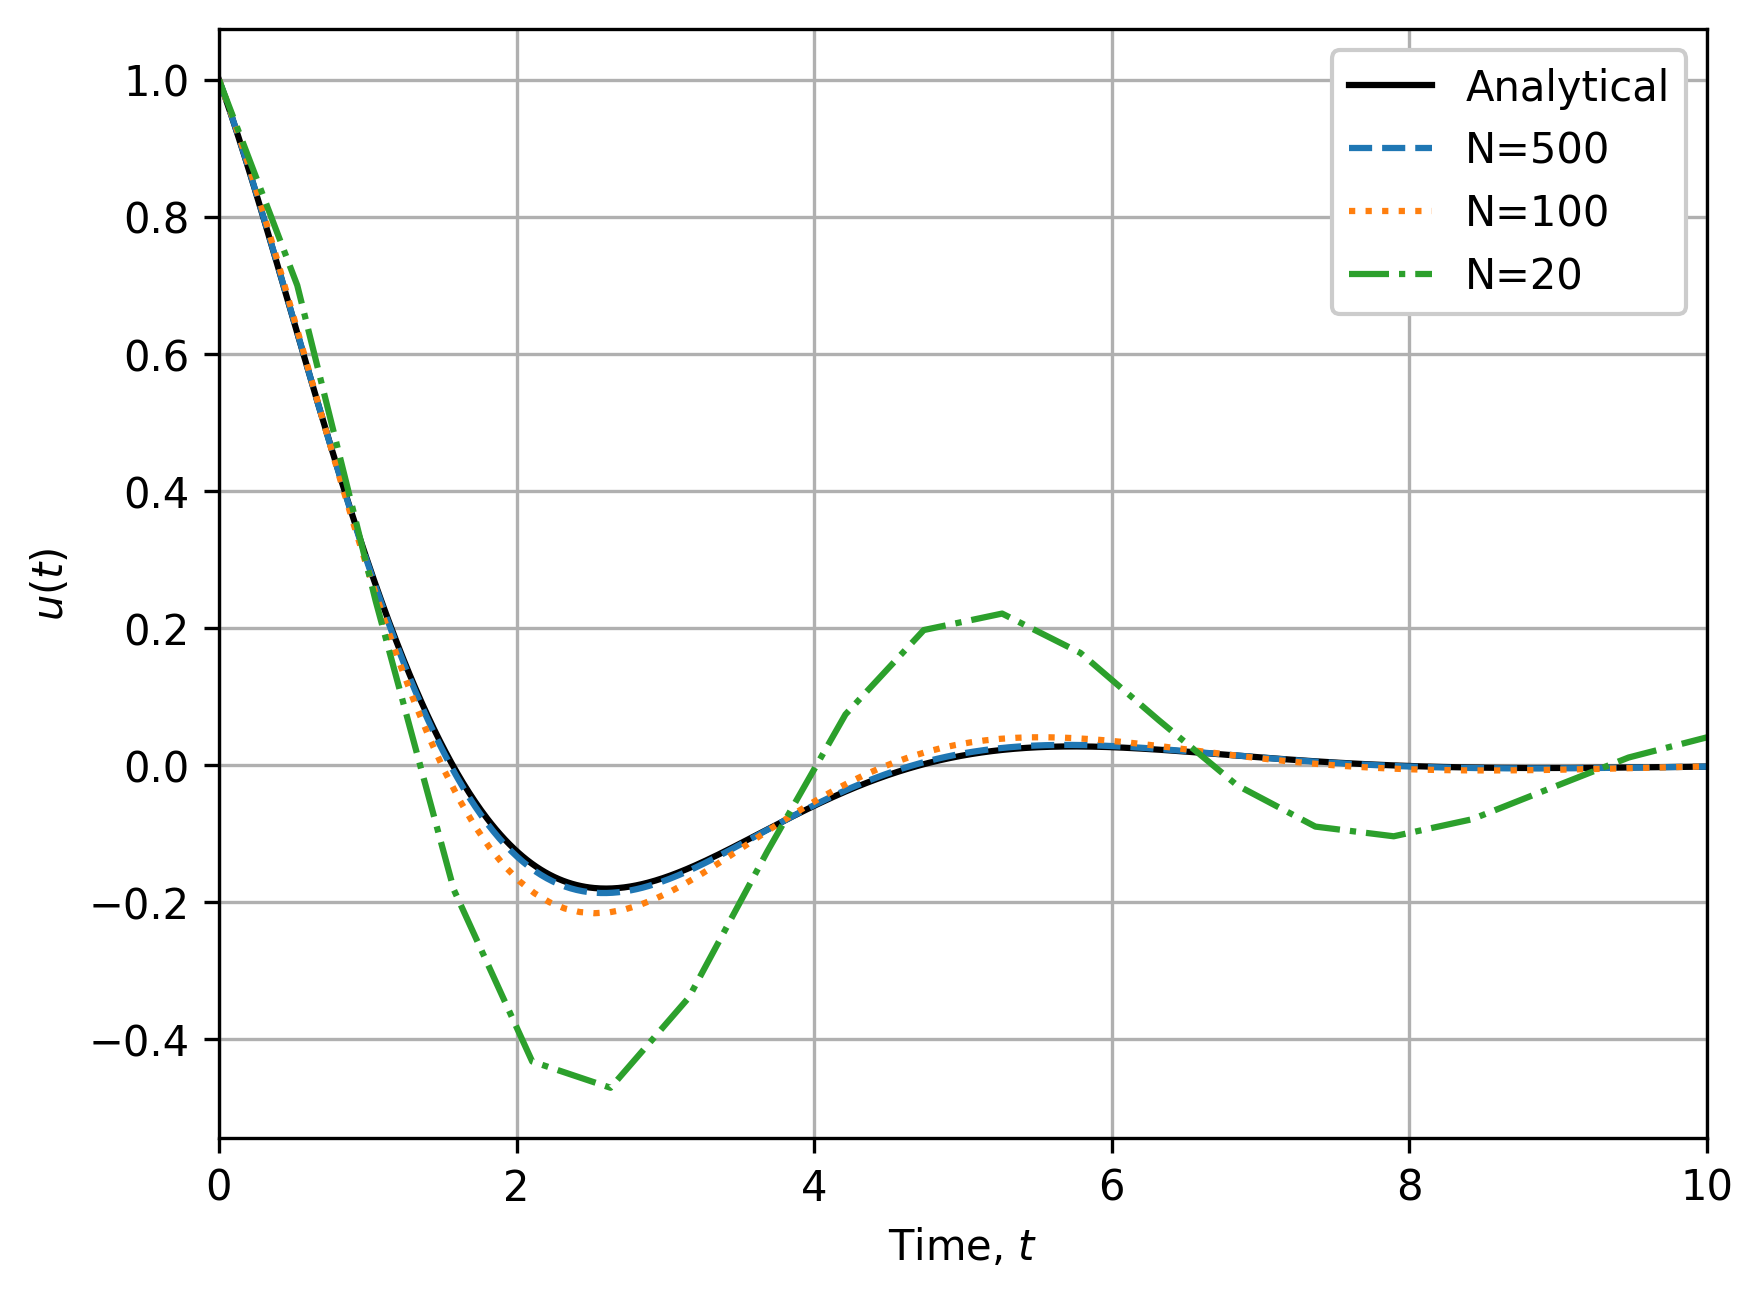

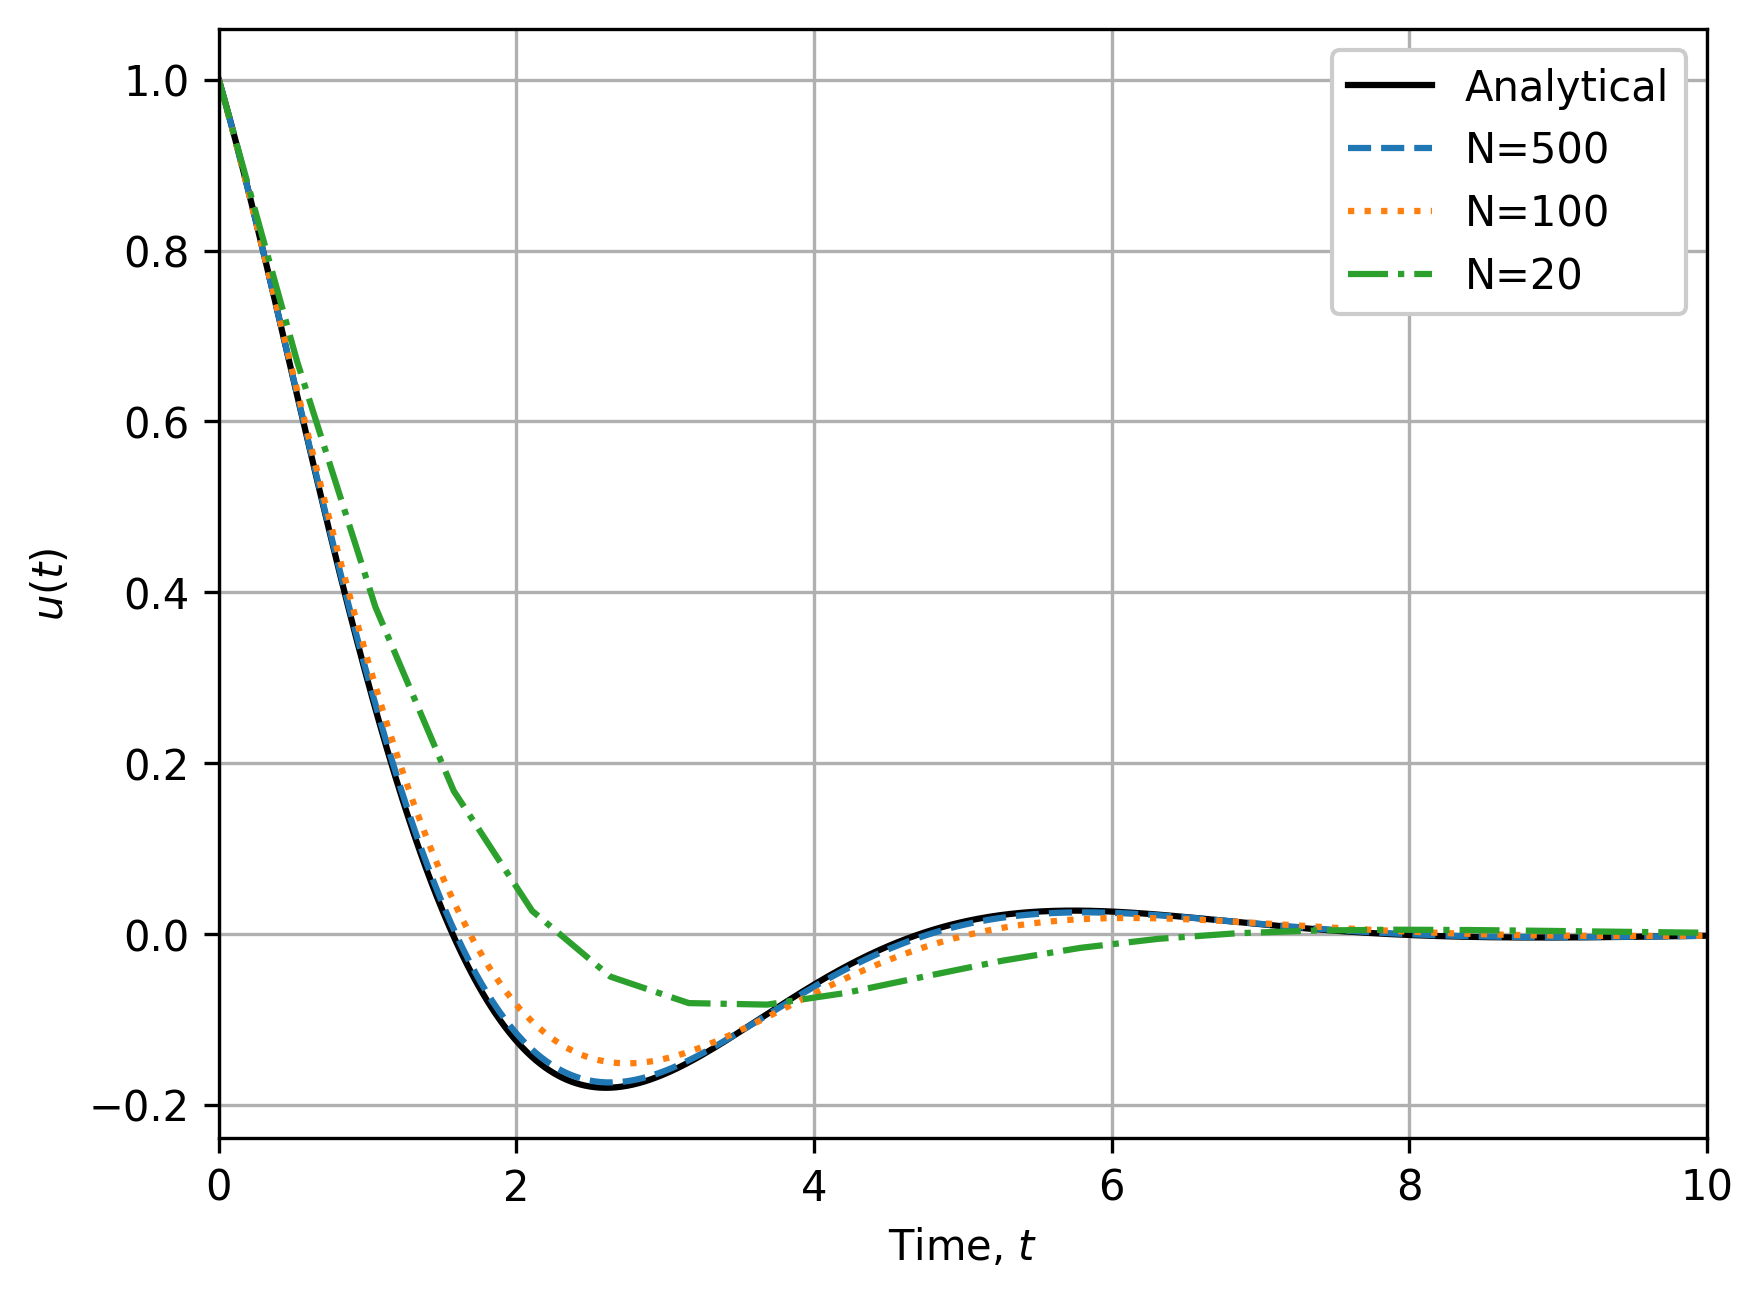

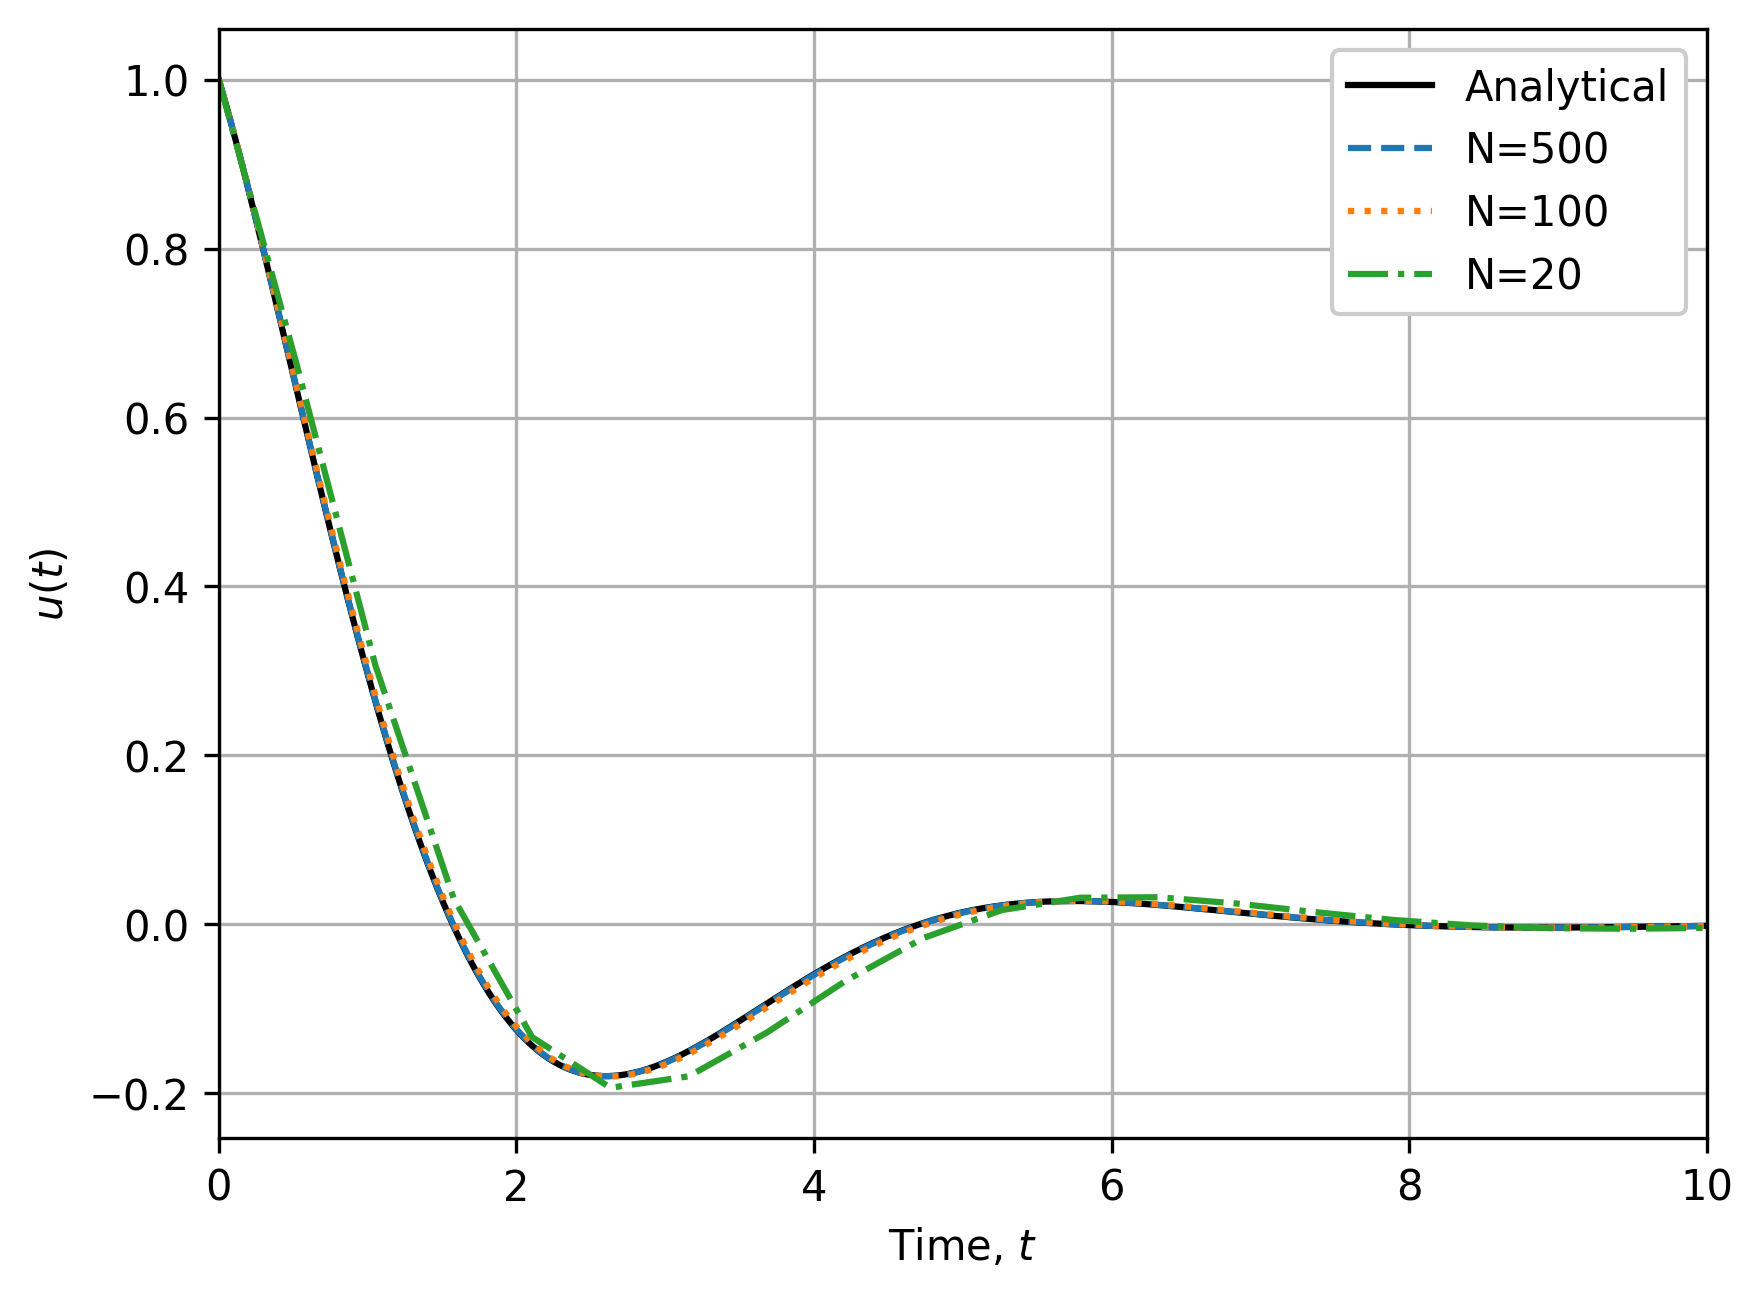

In [157]:
import numpy as np
import cmath
import matplotlib.pyplot as plt

# Subtask 2&4
# -----------

# Define time intervals and timesteps for each N
t_1 = np.linspace(0, 10, 20)
delta_t_1 = 10/20
t_2 = np.linspace(0, 10, 100)
delta_t_2 = 10/100
t_3 = np.linspace(0, 10, 500)
delta_t_3 = 10/500

# Preallocate complex arrays to store u values
u_1 = np.zeros(len(t_1), dtype=np.complex64)
u_2 = np.zeros(len(t_2), dtype=np.complex64)
u_3 = np.zeros(len(t_3), dtype=np.complex64)

# Set initial conditions
u_1[0] = 1
u_2[0] = 1
u_3[0] = 1

# test_lambda = complex(-3/5, np.pi) # For subtask 2
test_lambda = complex(-3/5, 1) # For subtask 4

# Define analytical solution
t_ex = np.linspace(0,10,1000)
u_ex = np.array([np.exp(test_lambda*t) for t in t_ex])

# Explicit Euler
  # u_n is value of u at timestep n
  # y is the constant lambda
  # delta_t is the magnitude of the timestep
  # function outputs the value of u_n+1 (value at next timestep)
def explicit_euler(u_n, y, delta_t): 
    return (1+y*delta_t)*u_n

# Implicit Euler
  # u_n is value of u at timestep n
  # y is the constant lambda
  # delta_t is the magnitude of the timestep
  # function outputs the value of u_n+1 (value at next timestep)
def implicit_euler(u_n, y, delta_t): 
    return u_n/(1-y*delta_t)

# Crank-Nicolson
  # u_n is value of u at timestep n
  # y is the constant lambda
  # delta_t is the magnitude of the timestep
  # function outputs the value of u_n+1 (value at next timestep)
def crank_nicolson(u_n, y, delta_t): 
    return (1+y*delta_t/2)/(1-y*delta_t/2)*u_n

# Run and Plot Explicit Euler
for i in range(1, len(t_1)):
    u_1[i] = explicit_euler(u_1[i-1], test_lambda, delta_t_1)
for i in range(1, len(t_2)):
    u_2[i] = explicit_euler(u_2[i-1], test_lambda, delta_t_2)
for i in range(1, len(t_3)):
    u_3[i] = explicit_euler(u_3[i-1], test_lambda, delta_t_3)
plt.figure(dpi=300)
plt.plot(t_ex, np.real(u_ex), linestyle="solid", color='black', label="Analytical")
plt.plot(t_3, np.real(u_3), linestyle="dashed", marker='none', markersize=5, label="N=500")
plt.plot(t_2, np.real(u_2), linestyle="dotted", marker='none', markersize=5, label="N=100")
plt.plot(t_1, np.real(u_1), linestyle="dashdot", marker='none', label="N=20")
plt.legend(framealpha=1)
# plt.ylim((-10, 10))
plt.xlim((0,10))
# plt.title("Explicit Euler")
plt.xlabel(r'Time, $t$')
plt.ylabel(r'$u(t)$')
plt.grid(True)
plt.show()

# Run and Plot Implicit Euler
for i in range(1, len(t_1)):
    u_1[i] = implicit_euler(u_1[i-1], test_lambda, delta_t_1)
for i in range(1, len(t_2)):
    u_2[i] = implicit_euler(u_2[i-1], test_lambda, delta_t_2)
for i in range(1, len(t_3)):
    u_3[i] = implicit_euler(u_3[i-1], test_lambda, delta_t_3)
plt.figure(dpi=300)
plt.plot(t_ex, np.real(u_ex), linestyle="solid", color='black', label="Analytical")
plt.plot(t_3, np.real(u_3), linestyle="dashed", marker='none', markersize=5, label="N=500")
plt.plot(t_2, np.real(u_2), linestyle="dotted", marker='none', markersize=5, label="N=100")
plt.plot(t_1, np.real(u_1), linestyle="dashdot", marker='none', label="N=20")
plt.legend(framealpha=1)
plt.xlim((0,10))
# plt.title("Implicit Euler")
plt.xlabel(r'Time, $t$')
plt.ylabel(r'$u(t)$')
plt.grid(True)
plt.show()

# Run and Plot Crank-Nicolson
for i in range(1, len(t_1)):
    u_1[i] = crank_nicolson(u_1[i-1], test_lambda, delta_t_1)
for i in range(1, len(t_2)):
    u_2[i] = crank_nicolson(u_2[i-1], test_lambda, delta_t_2)
for i in range(1, len(t_3)):
    u_3[i] = crank_nicolson(u_3[i-1], test_lambda, delta_t_3)
plt.figure(dpi=300)
plt.plot(t_ex, np.real(u_ex), linestyle="solid", color='black', label="Analytical")
plt.plot(t_3, np.real(u_3), linestyle="dashed", marker='none', markersize=5, label="N=500")
plt.plot(t_2, np.real(u_2), linestyle="dotted", marker='none', markersize=5, label="N=100")
plt.plot(t_1, np.real(u_1), linestyle="dashdot", marker='none', label="N=20")
plt.legend(framealpha=1)
plt.xlim((0,10))
# plt.title("Crank-Nicolson")
plt.xlabel(r'Time, $t$')
plt.ylabel(r'$u(t)$')
plt.grid(True)
plt.show()

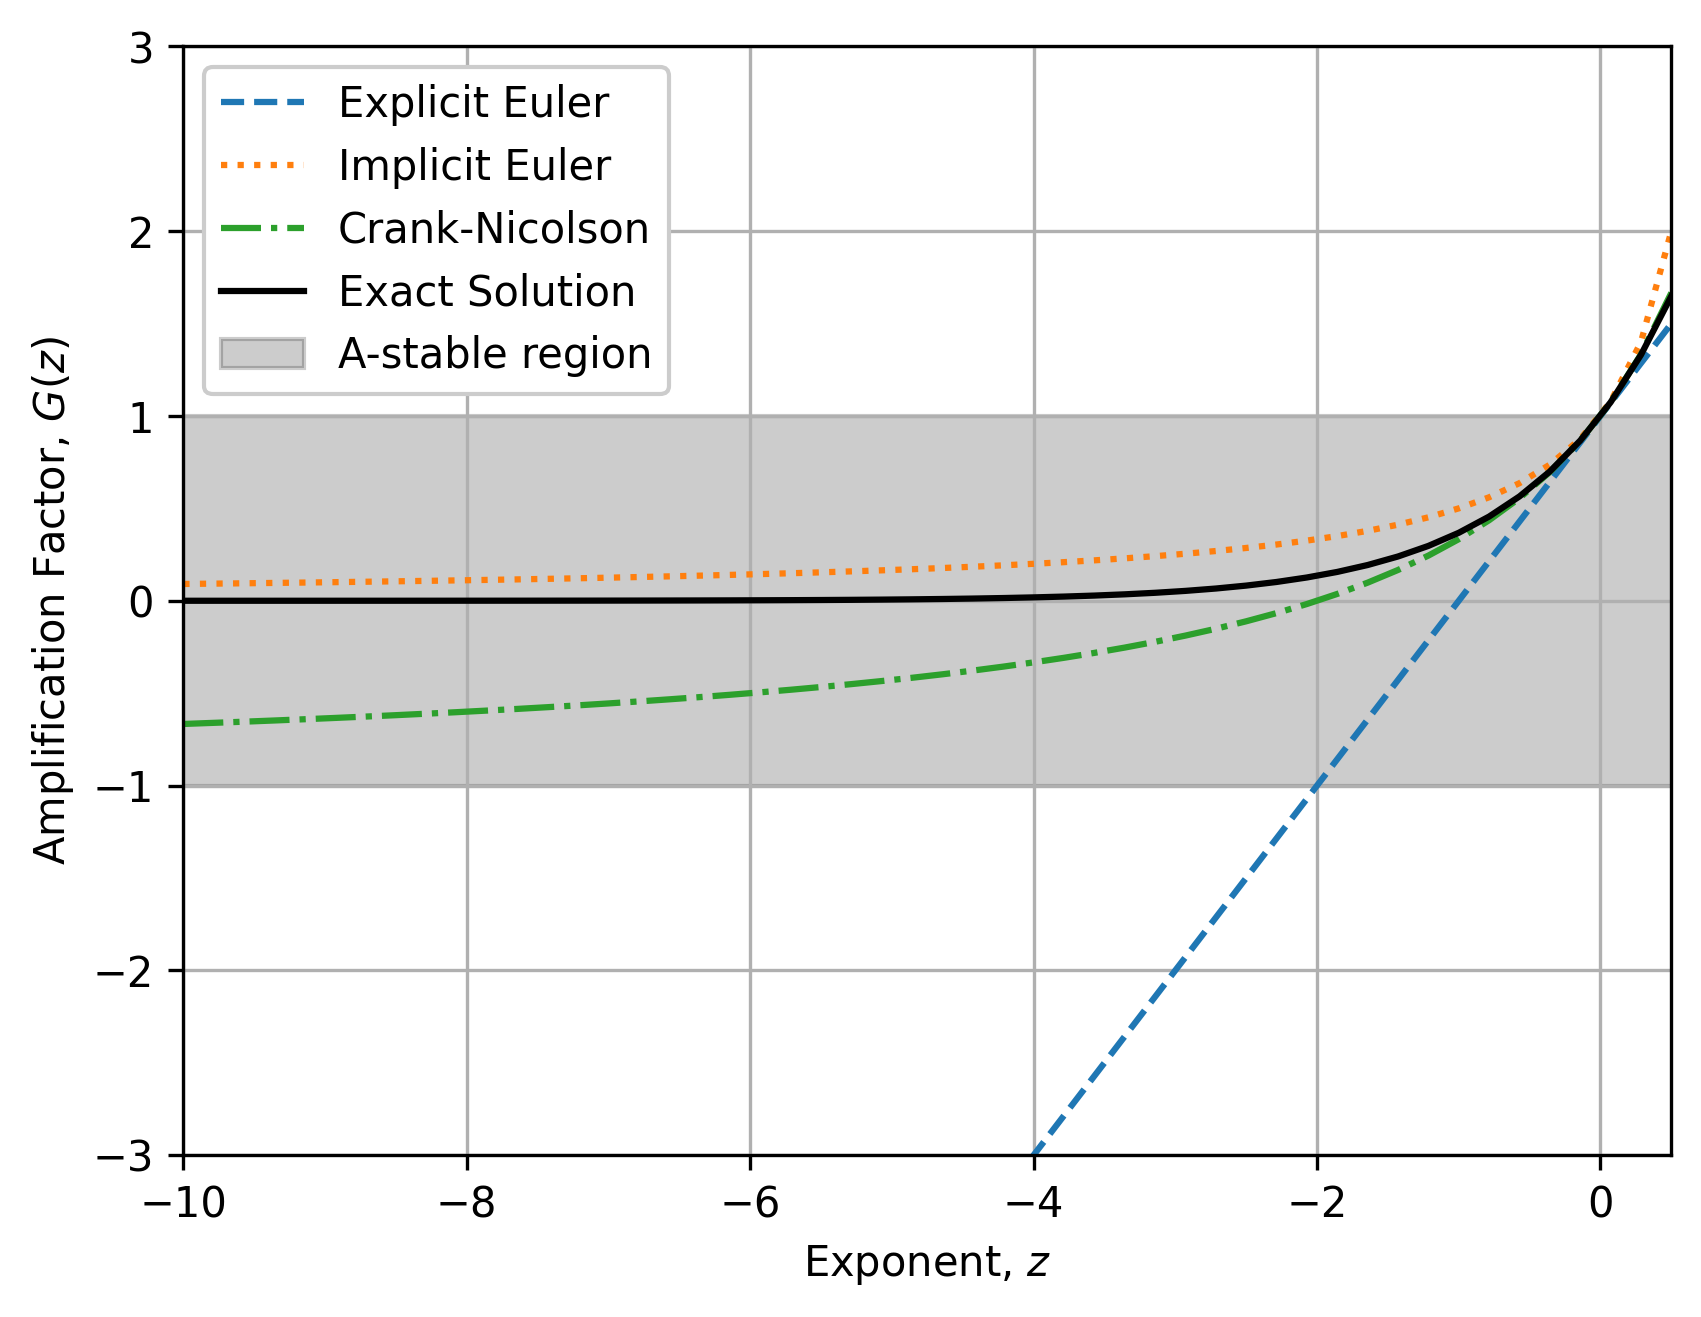

In [154]:
# Subtask 3
# ---------

z = np.linspace(-10, 0.5, 50)

# Calculate Amplification Factors
G_ee = 1 + z # Explicit Euler
G_ie = 1/(1-z) # Implicit Euler
G_cn = (2+z)/(2-z) # Crank-Nicolson
G_ex = np.exp(z) # Exact Solution

fig, ax = plt.subplots(dpi=300)
plt.plot(z, G_ee, label="Explicit Euler", linestyle='dashed')
plt.plot(z, G_ie, label="Implicit Euler", linestyle='dotted')
plt.plot(z, G_cn, label="Crank-Nicolson", linestyle='dashdot')
plt.plot(z, G_ex, label="Exact Solution", linestyle='solid', color='black')
# plt.plot([min(z), max(z)], [1, 1], linestyle='dashed', color='black')
ax.fill_between([-20, 20], [1, 1], [-1, -1], alpha=0.2, color='black', label="A-stable region")
plt.legend(framealpha=1)
plt.xlim((min(z), max(z)))
plt.ylim(-3,3)
plt.grid(True)
# plt.title("Stability of Numerical Integration Schemes")
plt.xlabel(r'Exponent, $z$')
plt.ylabel(r'Amplification Factor, $G(z)$')
plt.show()

# Task 2

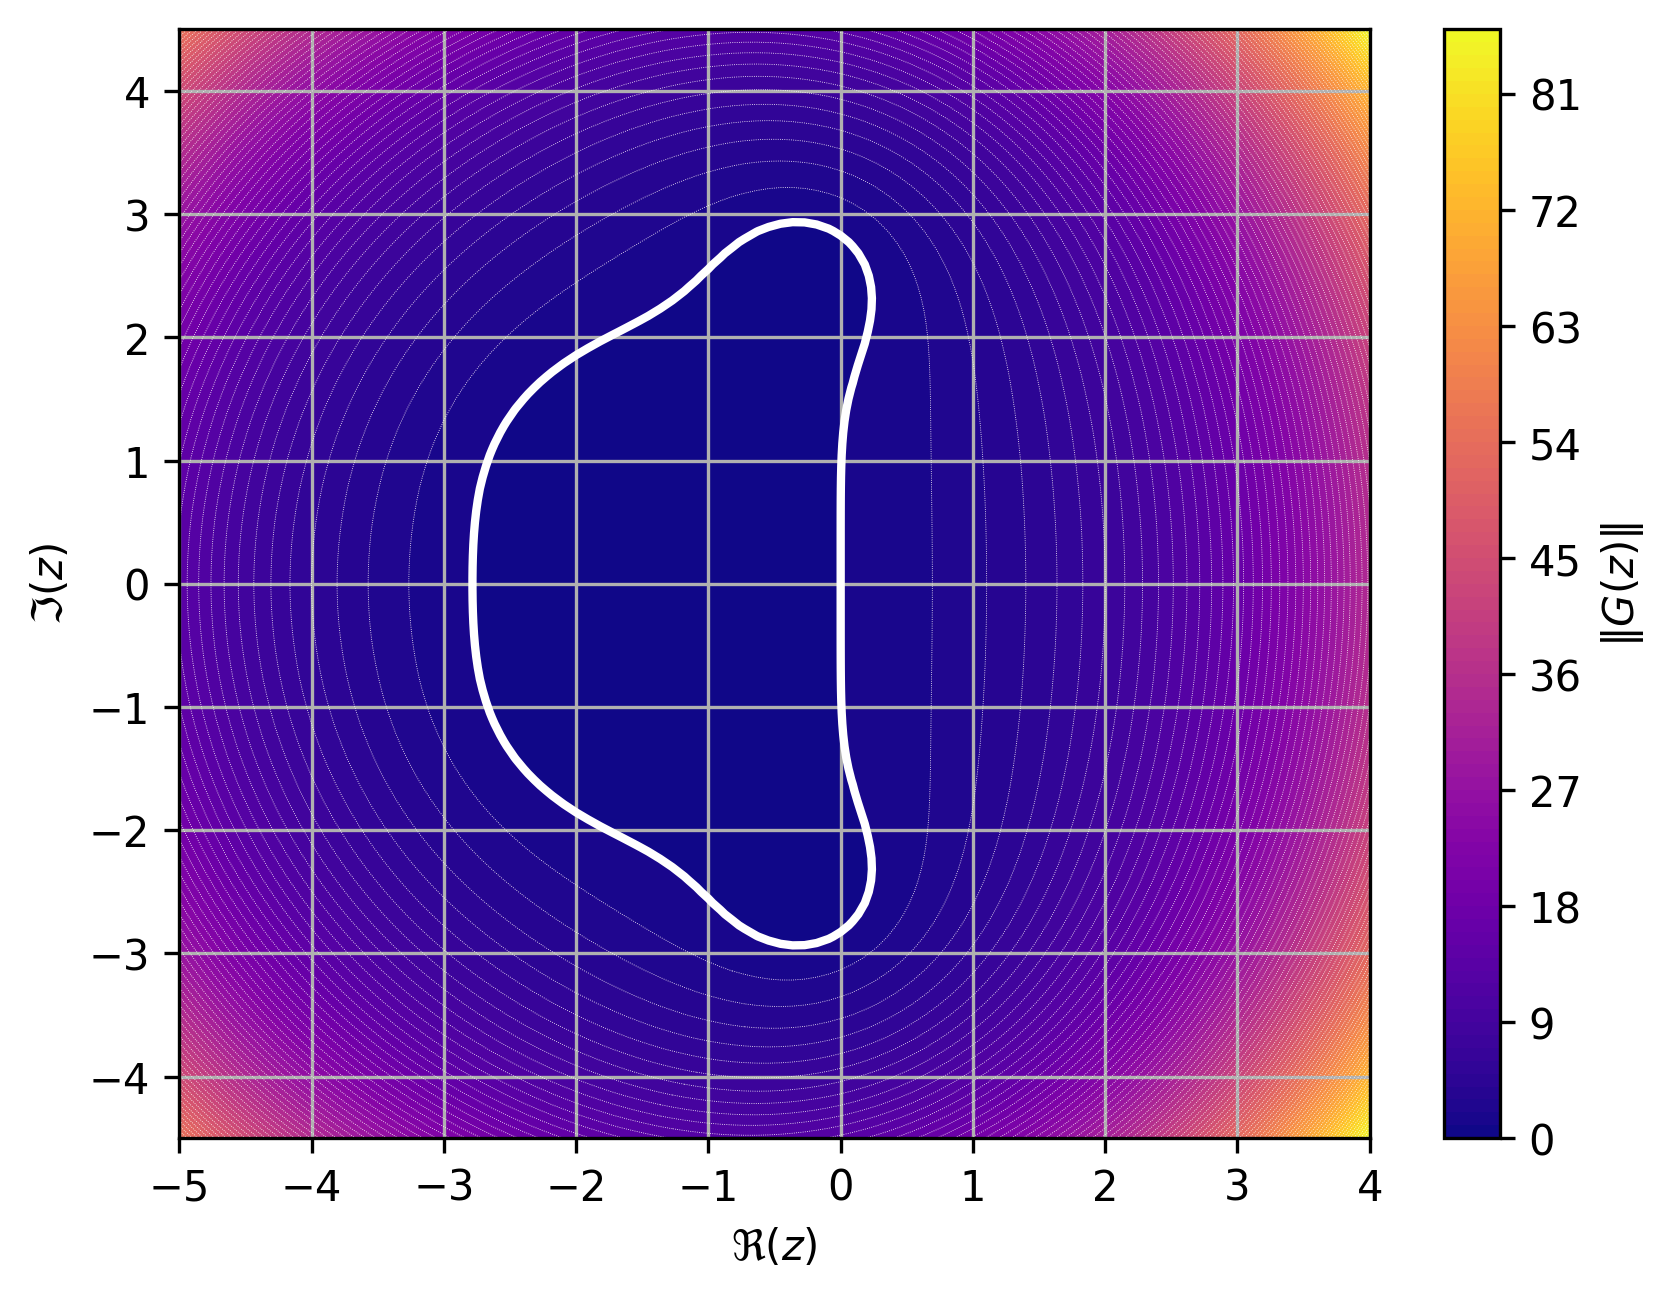

In [155]:
# Amplification Factor

r_range = np.linspace(-5,4,100)
i_range = np.linspace(-4.5,4.5,100)
r, i = np.meshgrid(r_range, i_range)
z = r + i*1j

G_rk4 = np.abs(1+z + z*z/2 + z*z*z/6 + z*z*z*z/24)
# G_ee = np.abs(1+z) # For Explicit Euler

fig, ax = plt.subplots(dpi=300)
contour = ax.contourf(r, i, G_rk4, 100, cmap='plasma')
plt.contour(r,i,G_rk4,100,colors='white', linewidths=0.2, linestyles='dotted')
plt.contour(r,i,G_rk4,[1],colors='white', linewidths=2)
# levels = ax.contour(r,i,G_ee,[-1,1],color='black', linestyle='dashed') # For Explicit Euler
fig.colorbar(contour, label=r'$\|G(z)\|$')
plt.grid(True)
# plt.title("Stability Region of Dahlquist Equation")
plt.xlabel(r'$\Re (z)$')
plt.ylabel(r'$\Im (z)$')
plt.show()

